In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [30]:
df = pd.read_csv("WaterData.csv")
df.describe()

,Plant,Type,BeakerShape,AirTemp,WaterTemp,RawPh,SettledPh,RawTurb,SettleTurb,RawFlowMGD,BasinSizeMG,MixerSpeed,MixTime,SettleTime,SolidsRemoved,Dosage
count,109.000000,109.0,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.0,109.0,109.000000,109.000000
mean,1.256881,1.0,1.0,58.146789,61.311927,7.746514,7.517706,0.685046,0.123670,5.572266,0.935780,30.0,15.0,20.0,0.922219,12.700917
std,0.438931,0.0,0.0,14.228184,6.649558,0.164093,0.221153,0.469997,0.045044,1.778254,0.109733,0.0,0.0,0.0,0.049861,4.926093
min,1.000000,1.0,1.0,33.000000,49.000000,7.380000,7.200000,0.300000,0.040000,1.872000,0.750000,30.0,15.0,20.0,0.722222,4.000000
25%,1.000000,1.0,1.0,46.000000,56.000000,7.660000,7.390000,0.470000,0.090000,4.507000,0.750000,30.0,15.0,20.0,0.905400,10.000000
50%,1.000000,1.0,1.0,60.000000,62.000000,7.720000,7.470000,0.560000,0.120000,5.590000,1.000000,30.0,15.0,20.0,0.939516,12.000000
75%,2.000000,1.0,1.0,70.000000,65.000000,7.880000,7.720000,0.760000,0.150000,6.830000,1.000000,30.0,15.0,20.0,0.957700,15.000000
max,2.000000,1.0,1.0,76.000000,73.000000,8.000000,7.890000,2.480000,0.260000,9.133000,1.000000,30.0,15.0,20.0,0.981200,35.000000


In [31]:
df.head()

,Date,Plant,Type,BeakerShape,AirTemp,WaterTemp,RawPh,SettledPh,RawTurb,SettleTurb,RawFlowMGD,BasinSizeMG,MixerSpeed,MixTime,SettleTime,SolidsRemoved,Dosage
0,2/16/2018,1,1,1,37,49,7.88,7.79,0.86,0.11,5.613,1.0,30,15,20,0.9054,9.8
1,2/16/2018,1,1,1,37,49,7.88,7.79,0.86,0.14,5.613,1.0,30,15,20,0.8796,8.5
2,2/16/2018,1,1,1,37,49,7.88,7.79,0.86,0.12,5.613,1.0,30,15,20,0.8968,11.8
3,2/16/2018,1,1,1,37,49,7.88,7.79,0.86,0.08,5.613,1.0,30,15,20,0.9312,13.0
4,3/9/2018,1,1,1,51,50,7.96,7.63,1.01,0.11,5.048,1.0,30,15,20,0.8889,11.5


In [32]:
cdf = df[['Type', 'BeakerShape', 'AirTemp', 'WaterTemp', 'RawPh', 'SettledPh', 'RawTurb','MixerSpeed', 'MixTime', 'SettleTime', 'SolidsRemoved', 'Dosage']]


In [33]:
X = cdf.iloc[:, :11].values
y = cdf.iloc[:, -1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [35]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [36]:
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d

,Actual,Predicted
0,10.0,12.896842
1,8.0,10.471936
2,10.0,11.609301
3,11.8,13.036808
4,10.8,13.064482
5,25.0,22.320932
6,30.0,13.386073
7,13.5,13.269405
8,15.0,12.216433
9,14.0,13.009039


In [37]:
pickle.dump(regressor, open('watermodel.pkl', 'wb'))

In [38]:
import seaborn as sns
%matplotlib inline

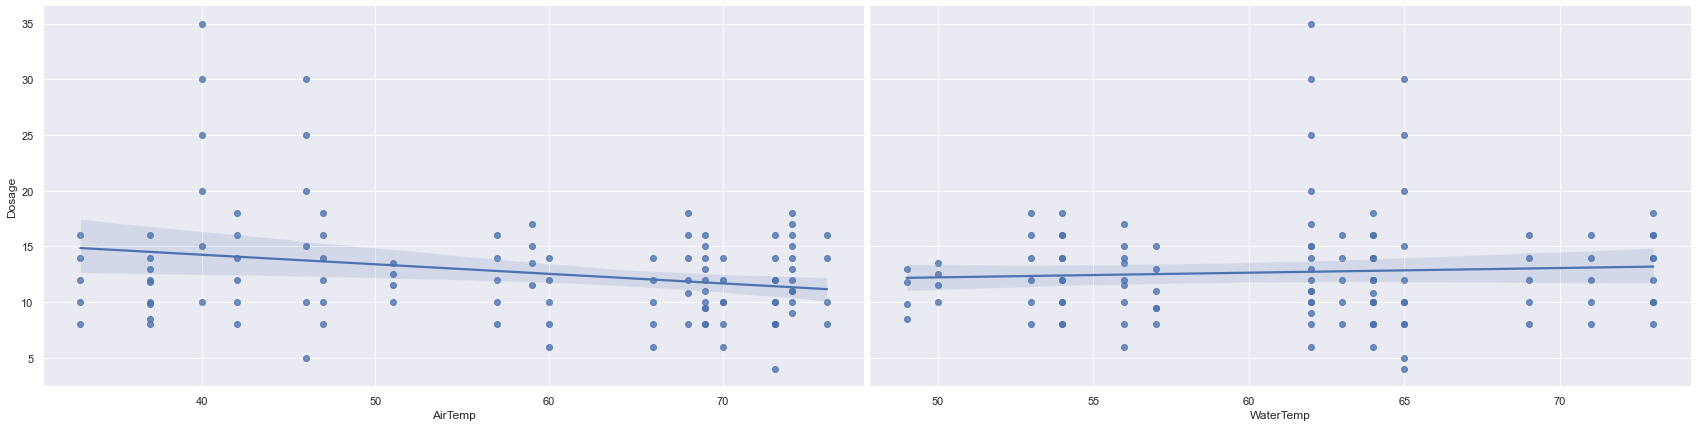

In [39]:
sns.pairplot(df, x_vars=['AirTemp', 'WaterTemp'], y_vars='Dosage', height=6, aspect=2, kind='reg')
sns.set(font_scale=1)

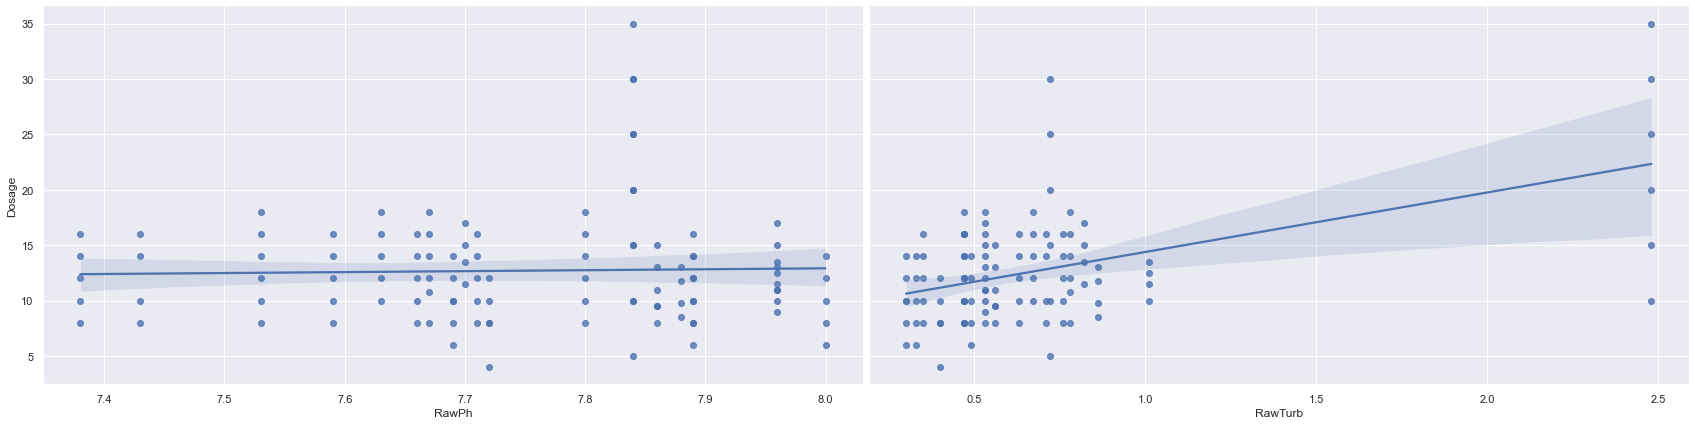

In [40]:
sns.pairplot(df, x_vars=['RawPh', 'RawTurb'], y_vars='Dosage', height=6, aspect=2, kind='reg')
sns.set(font_scale=1)